# Homework 2 Problem 2
Please finish the following code and copy the nessary result to the report for the discussion

### Part 0, data generation function
We would like to first import some necessary Libraries for this task and then write down the data generation function as follow. 

We also create the polynomial design matrix up to order k, which is given in polynomialfeatures function. 


In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from numpy.linalg import inv
%matplotlib inline

def ftrue(x):
    return np.sin(x)
def generatedata(ndata,seed):
    rng = np.random.RandomState(seed)
    Xtrain = np.linspace(0,1,ndata)
    Ytrain = np.sin(Xtrain*10.0) + 0.1 * rng.randn(ndata)
    return Xtrain,Ytrain

X,Y = generatedata(100,1)


def polynomialfeatures(x,k):
    if len(x.shape) == 1:
        x = x[:,np.newaxis] 
    index = range(1,k+1)
    X = np.concatenate([x**i for i in index],1)
    return X



### Part 1: Use BIC for tuning parameter selection
Please feel free to use the sklearn library [sklearn.linear_model.Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) to solve the Ridge regression in this section to find the tuning parameter selection. We don't need to do standarlization in this example since all $x^i\in [0,1]$ if $x \in [0,1]$, which are already in the same scale.

(a) Please compute and plot on how do the $RSS=\|y-\hat{y}\|^{2}$ and degree of freedom $df=trace(X(X^{T}X+\lambda I)^{-1}X^{T})$ change according to the tuning parameter $\lambda$. 




BIC values are:
 [ 13.88919634  12.40444272  11.07247853   9.4133197    9.73088628
 188.34691967 293.06075256 312.45922949 383.80634709 385.48820754
 384.85548041 383.91423961]
df values are:
 [9.82326058 9.3090507  8.96051229 8.52024861 7.54431132 5.20387301
 4.56413472 3.86486735 2.3290028  1.75074531 1.48786667 1.21930632]
RSS values are
 [ 0.73089468  0.73737905  0.73939569  0.74212414  0.77870771  5.17491021
 15.18671989 19.04126709 41.71283722 43.56513935 43.81761966 43.94730335]


Text(0.5,0,'lambda values')

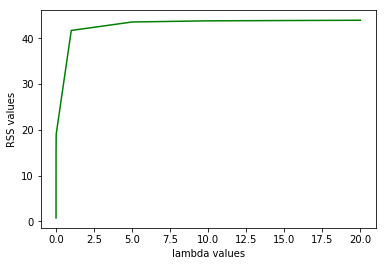

In [31]:
from sklearn import preprocessing
lambdaall = [1e-13, 1e-12,1e-11,1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
Xtrain,Ytrain = generatedata(100,1)
X1 = polynomialfeatures(Xtrain,10)
RSS = np.array(lambdaall)*0
df = np.array(lambdaall)*0
BIC = np.array(lambdaall)*0
for i,lambda1 in enumerate(lambdaall):
# Please complete this part, please use np.trace to compute the trace of a matrix
    clf1 = Ridge(alpha=lambda1,normalize=True)
    clf1.fit(polynomialfeatures(Xtrain,10),Ytrain)
    RSS[i] = np.sum((Ytrain-(clf1.predict(polynomialfeatures(Xtrain,10))))**2)
    inv_mat = inv((np.dot(X1.T,X1) + lambda1*np.identity(10)))
    df[i] = np.trace(np.dot(np.dot(X1,inv_mat),X1.T))
    BIC[i] = 100*np.log(RSS[i]) + np.log(100)*df[i] 
    
print("BIC values are:\n", BIC)
print("df values are:\n", df)
print("RSS values are\n", RSS)

plt.plot(lambdaall,RSS, color = "Green")
plt.ylabel("RSS values")
plt.xlabel("lambda values")


Text(0.5,0,'lambda values')

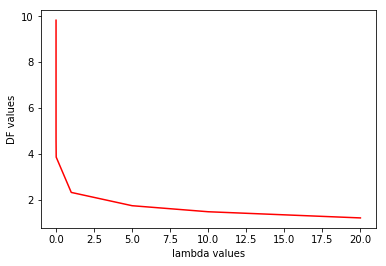

In [32]:
plt.plot(lambdaall,df, color = "red")
plt.ylabel("DF values")
plt.xlabel("lambda values")

(b) Please plot the following BIC criterion function for each tuning parameter $\lambda$. $BIC=n\log(RSS)+df\cdot\log(n)$

Text(0.5,0,'lambda values')

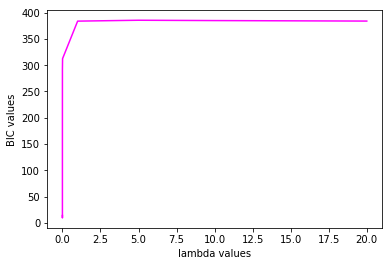

In [33]:
plt.plot(lambdaall,BIC, color = "Magenta")
plt.ylabel("BIC values")
plt.xlabel("lambda values")

### Part 3 Implement your own Cross-validation

Please use the K-fold function in sklearn as [sklearn.model_selection.KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to perform cross-validation. 

In [53]:
p = 30
from sklearn.model_selection import KFold
kf = KFold(n_splits=50,shuffle=True)
y_train1 = Ytrain.reshape(-1,1)
error = []
allalpha=  [1e-13, 1e-12,1e-11,1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
nalpha = len(allalpha)
valscore = np.zeros((nalpha,50))
for i,alpha in enumerate(allalpha):
    for j,(train_index, val_index) in enumerate(kf.split(X)):
        X_train, X_val = X1[train_index], X1[val_index]
        y_train, y_val = Y[train_index], Y[val_index]
        
        # Put your own code here, remember to put normalize=True for 'Ridge' Method
        clf2 = Ridge(alpha=alpha,normalize=True)
        clf2.fit(X_train,y_train)
        valscore[i,j] = np.sum((y_val-(clf2.predict(X_val))**2))
    mean_square_error = valscore.mean(axis=1)

print("The minimum MSE is:", min(mean_square_error))

The minimum MSE is: -0.5681743544671313


Text(0.5,0,'Alpha Values')

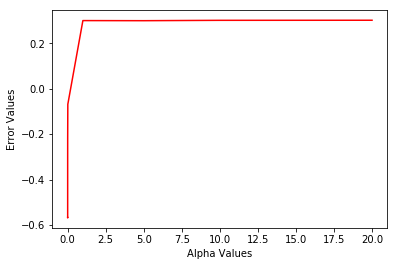

In [49]:
plt.plot(allalpha,error, color = "Red")
plt.ylabel("Error Values")
plt.xlabel("Alpha Values")